In [56]:
pip install tensorflow

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/facebook_page_scraper-5.0.2-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


### Neural Networks

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

In [77]:
# Loading the dataset
new_df = pd.read_csv("final_df4.csv")

In [78]:
new_df.head()

,driver_number,position,points,grid,laps,status,driver_id,constructor_id,fastest_lap_rank,fastest_lap,fastest_lap_time,fastest_lap_speed,raceName,date,season,driverId,dateOfBirth,nationality,driverFullName
0,3,1,10.0,3,58,Finished,michael_schumacher,ferrari,1,1,1,1,Australian Grand Prix,2000-03-12,2000,michael_schumacher,1969-01-03,German,Michael Schumacher
1,4,2,6.0,4,58,Finished,barrichello,ferrari,1,1,1,1,Australian Grand Prix,2000-03-12,2000,barrichello,1972-05-23,Brazilian,Rubens Barrichello
2,9,3,4.0,11,58,Finished,ralf_schumacher,williams,1,1,1,1,Australian Grand Prix,2000-03-12,2000,ralf_schumacher,1975-06-30,German,Ralf Schumacher
3,22,4,3.0,8,58,Finished,villeneuve,bar,1,1,1,1,Australian Grand Prix,2000-03-12,2000,villeneuve,1971-04-09,Canadian,Jacques Villeneuve
4,11,5,2.0,9,58,Finished,fisichella,benetton,1,1,1,1,Australian Grand Prix,2000-03-12,2000,fisichella,1973-01-14,Italian,Giancarlo Fisichella


In [79]:
new_df.isnull().sum()

driver_number        0
position             0
points               0
grid                 0
laps                 0
status               0
driver_id            0
constructor_id       0
fastest_lap_rank     0
fastest_lap          0
fastest_lap_time     0
fastest_lap_speed    0
raceName             0
date                 0
season               0
driverId             0
dateOfBirth          0
nationality          0
driverFullName       0
dtype: int64

In [80]:
# Assuming new_df is loaded and prepared correctly
season_summary = new_df.groupby(['season', 'driver_id']).agg(
    total_points=pd.NamedAgg(column='points', aggfunc='sum'),
    total_wins=pd.NamedAgg(column='position', aggfunc=lambda x: (x==1).sum()),
    total_podiums=pd.NamedAgg(column='position', aggfunc=lambda x: (x<=3).sum()),
    average_finish_position=pd.NamedAgg(column='position', aggfunc='mean'),
    races_participated=pd.NamedAgg(column='raceName', aggfunc='count')
).reset_index()

# Correctly determining the champion
# Correctly determining the champion by using "max" as a string instead of the max function directly
season_summary['is_champion'] = season_summary.groupby('season')['total_points'].transform("max") == season_summary['total_points']
season_summary['is_champion'] = season_summary['is_champion'].astype(int)


In [81]:
season_summary

,season,driver_id,total_points,total_wins,total_podiums,average_finish_position,races_participated,is_champion
0,2000,alesi,0.0,0,0,16.117647,17,0
1,2000,barrichello,62.0,1,9,6.294118,17,0
2,2000,burti,0.0,0,0,11.000000,1,0
3,2000,button,12.0,0,0,11.235294,17,0
4,2000,coulthard,73.0,3,11,5.176471,17,0
...,...,...,...,...,...,...,...,...
569,2023,sainz,178.0,1,3,7.500000,22,0
570,2023,sargeant,1.0,0,0,15.818182,22,0
571,2023,stroll,68.0,0,0,11.181818,22,0
572,2023,tsunoda,14.0,0,0,13.181818,22,0


In [82]:
champion_rows = season_summary[season_summary['is_champion'] == 1]
champion_rows

,season,driver_id,total_points,total_wins,total_podiums,average_finish_position,races_participated,is_champion
14,2000,michael_schumacher,108.0,9,12,5.294118,17,1
38,2001,michael_schumacher,123.0,9,14,3.352941,17,1
60,2002,michael_schumacher,144.0,11,17,1.411765,17,1
84,2003,michael_schumacher,93.0,6,8,4.250000,16,1
109,2004,michael_schumacher,148.0,13,15,2.611111,18,1
122,2005,alonso,133.0,7,15,3.631579,19,1
149,2006,alonso,134.0,7,14,3.555556,18,1
190,2007,raikkonen,110.0,6,12,4.235294,17,1
209,2008,hamilton,98.0,5,10,5.222222,18,1
229,2009,button,95.0,6,9,4.352941,17,1


In [83]:
# Encoding categorical variables
categorical_columns = ['driver_id']
encoder = LabelEncoder()
for col in categorical_columns:
    season_summary[col] = encoder.fit_transform(season_summary[col])

In [84]:
numerical_columns = ['total_points', 'total_wins', 'total_podiums', 'average_finish_position', 'races_participated']
scaler = StandardScaler()
season_summary[numerical_columns] = scaler.fit_transform(season_summary[numerical_columns])

In [85]:
season_summary

,season,driver_id,total_points,total_wins,total_podiums,average_finish_position,races_participated,is_champion
0,2000,3,-0.665501,-0.351551,-0.557793,1.133584,0.051160,0
1,2000,8,0.018489,0.091944,1.553238,-1.258128,0.051160,0
2,2000,17,-0.665501,-0.351551,-0.557793,-0.112397,-2.922601,0
3,2000,18,-0.533116,-0.351551,-0.557793,-0.055111,0.051160,0
4,2000,21,0.139843,0.978934,2.022356,-1.530239,0.051160,0
...,...,...,...,...,...,...,...,...
569,2023,99,1.298214,0.091944,0.145884,-0.964534,0.980460,0
570,2023,101,-0.654469,-0.351551,-0.557793,1.060674,0.980460,0
571,2023,106,0.084682,-0.351551,-0.557793,-0.068131,0.980460,0
572,2023,109,-0.511052,-0.351551,-0.557793,0.418805,0.980460,0


In [86]:
# Preparing data for modeling
X = season_summary.drop('is_champion', axis=1)
y = season_summary['is_champion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
print("Training Set X_train:")
X_train

Training Set X_train:


,season,driver_id,total_points,total_wins,total_podiums,average_finish_position,races_participated
182,2007,41,0.536998,1.422429,2.256915,-1.830993,0.05116
63,2002,91,-0.400731,-0.351551,0.380443,-0.026468,0.05116
158,2006,56,-0.599309,-0.351551,-0.323234,-0.031242,-1.99330
60,2002,73,0.923122,4.526895,3.429710,-2.446823,0.05116
15,2000,92,-0.400731,-0.351551,0.145884,-0.441795,0.05116
...,...,...,...,...,...,...,...
71,2002,120,-0.665501,-0.351551,-0.557793,1.030028,-0.69228
106,2004,53,-0.632405,-0.351551,-0.557793,0.401590,0.23702
270,2010,107,-0.146992,-0.351551,-0.557793,0.067000,0.42288
435,2017,68,1.187893,0.535439,0.380443,-0.526292,0.60874


In [88]:
print("Training Set y_train:")
y_train

Training Set y_train:


182    0
63     0
158    0
60     1
15     0
      ..
71     0
106    0
270    0
435    0
102    0
Name: is_champion, Length: 459, dtype: int64

In [89]:
print("Testing Set X_test:")
X_test

Testing Set X_test:


,season,driver_id,total_points,total_wins,total_podiums,average_finish_position,races_participated
514,2021,56,-0.665501,-0.351551,-0.557793,0.739739,-2.736741
70,2002,115,-0.643437,-0.351551,-0.557793,0.646649,0.051160
131,2005,50,-0.610341,-0.351551,-0.557793,0.835845,0.422880
422,2017,11,2.699292,0.978934,2.491474,-1.901885,0.608740
545,2022,94,-0.290410,-0.351551,-0.557793,0.252804,0.980460
...,...,...,...,...,...,...,...
75,2003,18,-0.477955,-0.351551,-0.557793,-0.158048,-0.134700
250,2010,8,-0.146992,-0.351551,-0.557793,-0.099583,0.422880
531,2022,5,0.228099,-0.351551,-0.557793,-0.145598,0.980460
509,2021,5,0.228099,-0.351551,-0.323234,-0.377999,0.980460


In [90]:
print("Testing Set y_test:")
y_test

Testing Set y_test:


514    0
70     0
131    0
422    0
545    0
      ..
75     0
250    0
531    0
509    0
68     0
Name: is_champion, Length: 115, dtype: int64

In [91]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Specify the input shape
    Dense(3, activation='relu'),  # Hidden layer with 3 units
    Dense(1, activation='sigmoid')  # Output layer with 1 unit for binary classification
])

In [93]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [94]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=1)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0252 - loss: 299.4638 - val_accuracy: 0.0522 - val_loss: 61.3216
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.4632 - loss: 22.7052 - val_accuracy: 0.9478 - val_loss: 8.4031
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.9639 - loss: 6.3247 - val_accuracy: 0.9478 - val_loss: 9.9591
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.9643 - loss: 6.7400 - val_accuracy: 0.9478 - val_loss: 8.9320
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.9555 - loss: 7.1375 - val_accuracy: 0.9478 - val_loss: 6.9952
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.9726 - loss: 3.3492 - val_accuracy: 0.9478 - val_loss: 5.2193
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.9715 - loss: 2.3679 - val_accuracy: 0.9478 - val_loss: 3.2791
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.9607 - loss: 2.1421 - val_accuracy: 

In [95]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.9767 - loss: 0.0915
Test accuracy: 96.52%


In [96]:
# Predictions and Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Confusion Matrix:
[[109   0]
 [  4   2]]


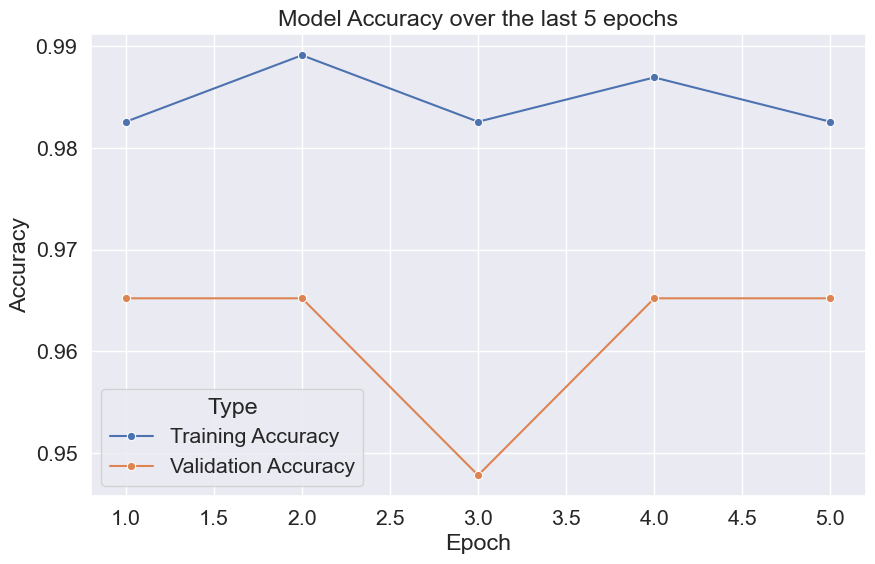

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'history' is your training history object from a Keras model
# Extracting the last 5 epochs for both training and validation accuracy
data = pd.DataFrame({
    'Epoch': range(1, 6),  # Adjust according to the actual number of epochs if different
    'Training Accuracy': history.history['accuracy'][-5:],
    'Validation Accuracy': history.history['val_accuracy'][-5:]
})

# Melting the DataFrame to work better with Seaborn's functionality
data_melted = data.melt('Epoch', var_name='Type', value_name='Accuracy')

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_melted, x='Epoch', y='Accuracy', hue='Type', marker='o')

# Adding titles and labels
plt.title('Model Accuracy over the last 5 epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Display the plot
plt.show()


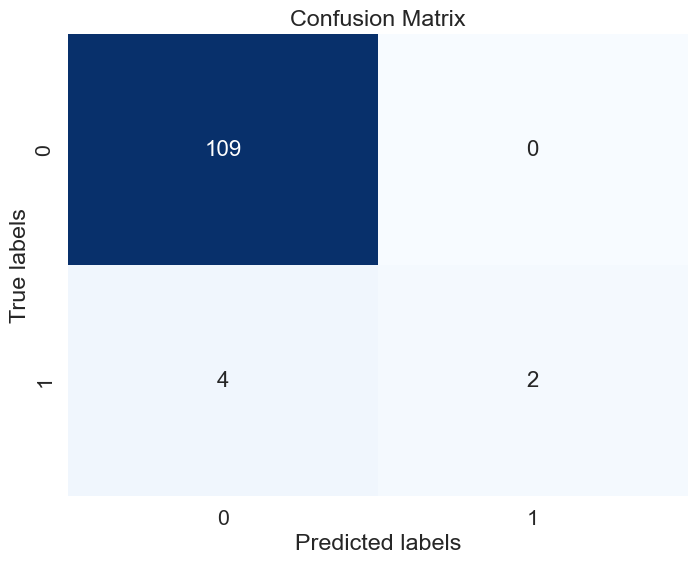

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)  # 'fmt' is the string format for numeric value

# Adding labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()
